In [204]:
# Load the required libraries and data

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

ticker = ["cgc"]
stock_data = yf.download(ticker, start="2019-04-20", end="2022-04-20")
#below i was playing around with some yfinance ideas - want to come back to this to handle multi stock dfs
#tickers = yf.Tickers('msft aapl goog')
#stock_data = yf.download(ticker, start="2019-04-20", end="2022-04-20")
#tickers.tickers.msft.info

[*********************100%***********************]  1 of 1 completed


In [205]:
# create/read data into dataframe
# took me a minute/reading yfinance documenation - i did not fully realize the request gives a df return - but there ar
#...some other things to look back to - multi/single etc

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-22,45.900002,48.700001,45.070000,48.250000,48.250000,11913300
2019-04-23,48.340000,48.630001,46.860001,47.410000,47.410000,8244100
2019-04-24,47.270000,48.660000,46.639999,48.369999,48.369999,6385800
2019-04-25,48.099998,48.523998,47.500000,48.200001,48.200001,4185000
2019-04-26,48.189999,50.430000,48.119999,49.910000,49.910000,12612500


In [181]:
# double check for null values
stock_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [182]:
# Shape of dataframe

stock_data.shape

(756, 6)

In [183]:
# Drop na
stock_data.dropna(inplace=True)

In [184]:
stock_data["HighPCT"] = stock_data["High"].pct_change()

#stock_data['HL_PCT']=(stock_data['High']-stock_data['Low'])/stock_data['Adj Close']*100
#stock_data['PCT_change']=(stock_data['Adj Close']-stock_data['Open'])/stock_data['Open']*100

stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,HighPCT
Date,,,,,,,
2019-04-22,45.900002,48.700001,45.070000,48.250000,48.250000,11913300,NaN
2019-04-23,48.340000,48.630001,46.860001,47.410000,47.410000,8244100,-0.001437
2019-04-24,47.270000,48.660000,46.639999,48.369999,48.369999,6385800,0.000617
2019-04-25,48.099998,48.523998,47.500000,48.200001,48.200001,4185000,-0.002795
2019-04-26,48.189999,50.430000,48.119999,49.910000,49.910000,12612500,0.039280


In [185]:
stock_data1 = stock_data[['Adj Close' , 'Volume', 'HighPCT']]
stock_data1.head()

,Adj Close,Volume,HighPCT
Date,,,
2019-04-22,48.250000,11913300,NaN
2019-04-23,47.410000,8244100,-0.001437
2019-04-24,48.369999,6385800,0.000617
2019-04-25,48.200001,4185000,-0.002795
2019-04-26,49.910000,12612500,0.039280


In [186]:
stock_data1.dropna(inplace=True)


/Users/jasonraeppold/opt/anaconda3/envs/dev/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [187]:
stock_data1.corr

<bound method DataFrame.corr of             Adj Close    Volume   HighPCT
Date                                     
2019-04-23  47.410000   8244100 -0.001437
2019-04-24  48.369999   6385800  0.000617
2019-04-25  48.200001   4185000 -0.002795
2019-04-26  49.910000  12612500  0.039280
2019-04-29  52.029999  13118000  0.043030
...               ...       ...       ...
2022-04-12   6.780000   4876100  0.052250
2022-04-13   7.110000   4641100 -0.017931
2022-04-14   6.820000   4848400 -0.011236
2022-04-18   5.990000  10625600 -0.029830
2022-04-19   5.930000   6861100 -0.112738

[755 rows x 3 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

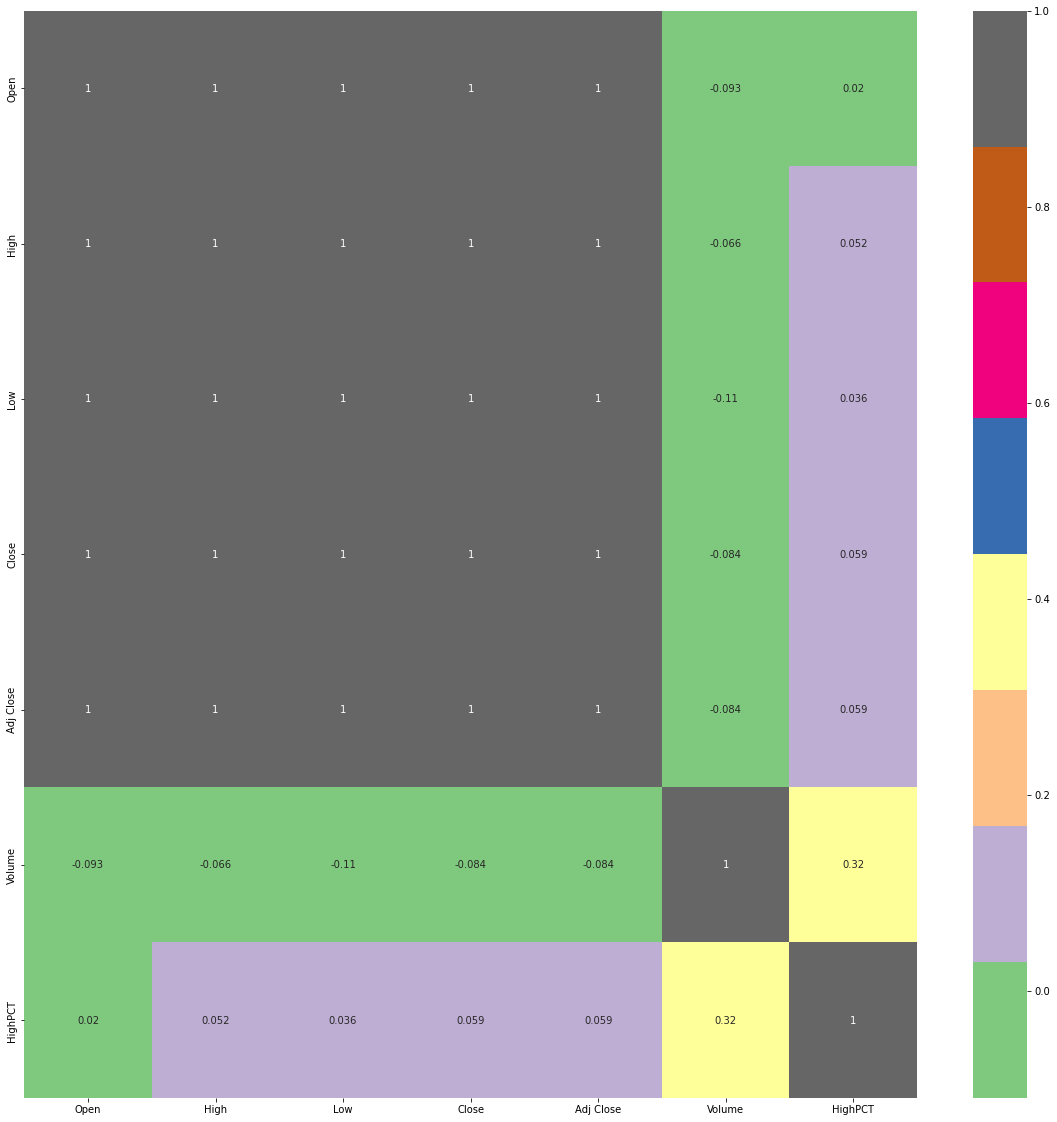

In [188]:
plt.figure(figsize=(20,20))
sns.heatmap(stock_data.corr() , annot=True, cmap=plt.cm.Accent)
plt.show

In [189]:
stock_data1.isnull().sum()


Adj Close    0
Volume       0
HighPCT      0
dtype: int64

In [190]:
X = stock_data1.drop('Adj Close', axis=1)

y = stock_data1['Adj Close']

X.head()

,Volume,HighPCT
Date,,
2019-04-23,8244100,-0.001437
2019-04-24,6385800,0.000617
2019-04-25,4185000,-0.002795
2019-04-26,12612500,0.039280
2019-04-29,13118000,0.043030


In [191]:
y.head()

Date
2019-04-23    47.410000
2019-04-24    48.369999
2019-04-25    48.200001
2019-04-26    49.910000
2019-04-29    52.029999
Name: Adj Close, dtype: float64

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=78)

In [193]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((604, 2), (604,), (151, 2), (151,))

In [194]:
scaler = StandardScaler()


In [195]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [196]:
print(y_train)

Date
2021-07-16    19.580000
2021-10-26    13.170000
2022-03-14     5.700000
2020-12-23    27.010000
2019-12-18    19.730000
                ...    
2020-07-15    18.150000
2019-09-20    25.559999
2019-06-19    42.770000
2021-03-04    31.010000
2022-02-11     9.220000
Name: Adj Close, Length: 604, dtype: float64


In [197]:
print(X_train)

[[-0.64010922 -0.16911014]
 [-0.34408466  0.05845536]
 [-0.11911308 -1.27783747]
 ...
 [-0.61652813  0.2554748 ]
 [ 0.15284373 -1.22384194]
 [ 2.55822576  1.19998404]]


In [198]:

jr_model = LinearRegression()
jr_model.fit(X_train, y_train)
predictions = jr_model.predict(X_test)


In [199]:
#see above
# predictions = jr_model.predict(X_test)
#predictions

In [200]:
y_test

Date
2021-05-17    23.150000
2021-03-15    35.560001
2021-12-02    10.360000
2019-05-06    49.200001
2020-05-01    15.260000
                ...    
2021-11-16    14.380000
2021-08-09    19.110001
2020-05-12    14.770000
2021-02-05    42.930000
2019-09-13    27.459999
Name: Adj Close, Length: 151, dtype: float64

In [201]:
# Compare the actual versus predicted
comparison_df = pd.DataFrame({'Actual' : y_test , "Predicted" : predictions})
comparison_df

,Actual,Predicted
Date,,
2021-05-17,23.150000,22.534312
2021-03-15,35.560001,22.635770
2021-12-02,10.360000,19.830874
2019-05-06,49.200001,21.951321
2020-05-01,15.260000,20.119761
...,...,...
2021-11-16,14.380000,19.558127
2021-08-09,19.110001,21.858749
2020-05-12,14.770000,21.609055


<AxesSubplot:xlabel='Date'>

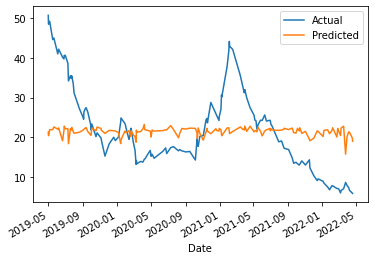

In [202]:
comparison_df.plot()

In [203]:
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:" , mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:" ,math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 8.044584458598468
Mean Squared Error: 105.04591211340988
Root Mean Squared Error: 10.249190802859019
